<a href="https://colab.research.google.com/github/Suchit-Thakur/ML_Project/blob/main/Analyzing_NNs_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1. Load the dataset
import pandas as pd

# Load the dataset
url = 'http://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

# Display the first fe rows of the dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
#2. Perform basic data analysis
# Check for missing values
print(data.isnull().sum())

# Diplay basic statistics
print(data.describe())

# Check the distribution of the target variable
print(data['Outcome'].value_counts())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedig

In [3]:
#Step 2: Preprocessing the data
#1. Feature scaling
from sklearn.preprocessing import MinMaxScaler

# Separate features and target variables
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

In [4]:
#2. Splitting the dataset
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [5]:
#Step 3: Implementing a deep learning neural network
#1. Build the neural network
import tensorflow as tf
from tensorflow.keras import layers, models

# Build the neural netork model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # First hidden layer
    layers.Dense(32, activation='relu'), # econd hidden layer
    layers.Dense(1, activation='sigmoid') # Output layer for binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
#2. Compile the model
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
#3. Train the model
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7570 - loss: 0.4539 - val_accuracy: 0.7886 - val_loss: 0.4209
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7956 - loss: 0.4190 - val_accuracy: 0.7967 - val_loss: 0.4226
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8133 - loss: 0.4065 - val_accuracy: 0.7805 - val_loss: 0.4236
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8195 - loss: 0.4047 - val_accuracy: 0.7724 - val_loss: 0.4297
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7947 - loss: 0.4311 - val_accuracy: 0.7967 - val_loss: 0.4284
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7980 - loss: 0.4360 - val_accuracy: 0.7724 - val_loss: 0.4272
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7806 - loss: 0.4392 - val_accuracy: 0.7724 - val_loss: 0.4287
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7902 - loss: 0.4264 - val_accuracy: 0.7967 - val_lo

In [8]:
#Step 4: Evaluating the results
#1. Evaluate the model on test data
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7914 - loss: 0.5200  
Test Loss: 0.5211
Test Accuracy: 0.7987


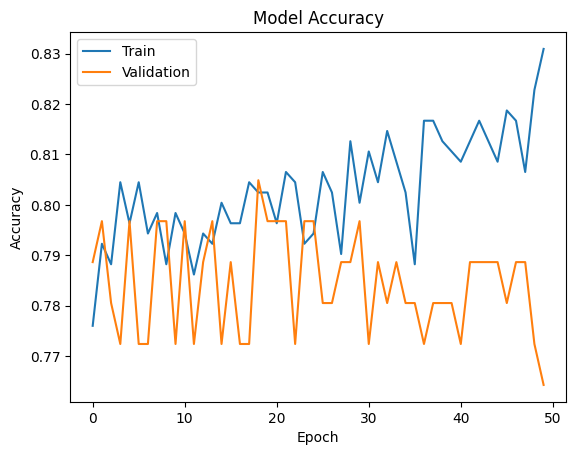

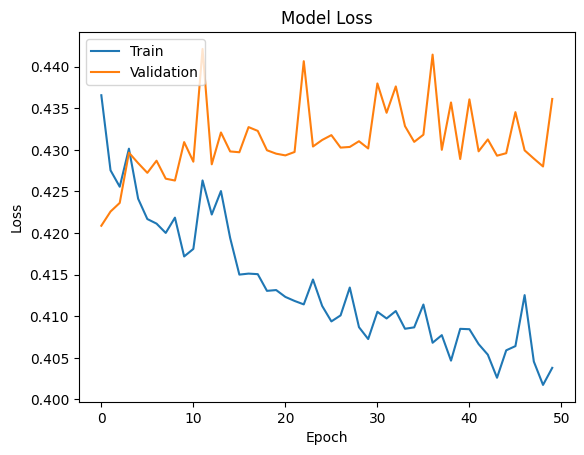

In [11]:
#2. Plot accuracy and loss
import matplotlib.pyplot as plt

#Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()